## Using the Robitaille (2017) YSO SED models

This notebook demonstrates how to use the YSO SED models published in Robitaille (2017).

### Format

The [published models](https://doi.org/10.5281/zenodo.166732) include a tar file for each set of models. The name of each
model set is composed of several characters that indicate which component is present. The characters, in order, are:

* ``s`` (star)
* ``p`` (passive disk)
* ``p`` (power-law envelope) or ``u`` (Ulrich envelope)
* ``b`` (bipolar cavities)
* ``h`` (inner hole)
* ``m`` (ambient medium)
* ``i`` (interstellar dust).

If a component is absent, a hyphen (``-``) is given instead.

Each tar file expands to give a directory with the same model set name. The format for each directory is described [here](http://sedfitter.readthedocs.io/en/stable/). 

The easiest way to access and fit these models in Python is to make use of the [astropy](http://www.astropy.org) and [sedfitter](http://sedfitter.readthedocs.io) packages.

### Accessing Parameters

Each model directory contains a ``parameters.fits`` file that includes the parameters for all the models. To read this, you can use for example the [astropy.table](http://docs.astropy.org/en/stable/table/index.html) package:

In [1]:
from astropy.table import Table

In [2]:
t = Table.read('sp--s-i/parameters.fits')

We can take a look at the first 15 rows of the table:

In [3]:
t[:15]

MODEL_NAME,star.radius,star.temperature,disk.mass,disk.rmax,disk.beta,disk.p,disk.h100,scattering,inclination
str20,float64,float64,float64,float64,float64,float64,float64,int64,float64
001eAZq2_01,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,9.31459655553
001eAZq2_02,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,15.447589641
001eAZq2_03,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,25.5465995801
001eAZq2_04,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,32.2286947342
001eAZq2_05,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,40.9575723094
001eAZq2_06,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,52.3419693327
001eAZq2_07,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,64.3422689634
001eAZq2_08,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,78.0657625737
001eAZq2_09,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,81.5416067501


The model name is a unique name that identifies each model and the viewing angle is indicated in the suffix (e.g. ``_01``). The value of the inclination is also given in the ``inclination`` column. The remaining columns give the parameters for the models (which columns are present depends on the model set). The scattering column indicates whether scattered light is included in the SEDs (for some very optically thick models, scattering was disabled).

### Accessing SEDs

The easiest way to access the SEDs in Python is to use the ``SEDCube`` class from the sedfitter package to read in the ``flux.fits`` file for the model set you are interested in:

In [4]:
from sedfitter.sed import SEDCube

In [5]:
seds = SEDCube.read('sp--s-i/flux.fits')

This 'SED cube' is an efficient way to store the models fluxes in a single 3D array, where the three dimensions are the model, the aperture, and the wavelength.

The model names can be accessed with:

In [6]:
seds.names

chararray(['001eAZq2_01', '001eAZq2_02', '001eAZq2_03', ..., 'zzudHOIm_07',
       'zzudHOIm_08', 'zzudHOIm_09'], 
      dtype='<U20')

while the apertures, wavelengths, and frequencies can be accessed with:

In [7]:
seds.apertures

<Quantity [  1.00000000e+02,  1.62377674e+02,  2.63665090e+02,
             4.28133240e+02,  6.95192796e+02,  1.12883789e+03,
             1.83298071e+03,  2.97635144e+03,  4.83293024e+03,
             7.84759970e+03,  1.27427499e+04,  2.06913808e+04,
             3.35981829e+04,  5.45559478e+04,  8.85866790e+04,
             1.43844989e+05,  2.33572147e+05,  3.79269019e+05,
             6.15848211e+05,  1.00000000e+06] AU>

In [8]:
seds.wav

<Quantity [  4.83863172e+03,  4.53135115e+03,  4.24358464e+03,
             3.97409293e+03,  3.72171547e+03,  3.48536542e+03,
             3.26402494e+03,  3.05674083e+03,  2.86262044e+03,
             2.68082780e+03,  2.51058002e+03,  2.35114394e+03,
             2.20183296e+03,  2.06200407e+03,  1.93105511e+03,
             1.80842215e+03,  1.69357708e+03,  1.58602533e+03,
             1.48530372e+03,  1.39097850e+03,  1.30264347e+03,
             1.21991822e+03,  1.14244649e+03,  1.06989465e+03,
             1.00195027e+03,  9.38320744e+02,  8.78732052e+02,
             8.22927580e+02,  7.70667009e+02,  7.21725280e+02,
             6.75891629e+02,  6.32968675e+02,  5.92771572e+02,
             5.55127213e+02,  5.19873485e+02,  4.86858568e+02,
             4.55940286e+02,  4.26985491e+02,  3.99869489e+02,
             3.74475507e+02,  3.50694187e+02,  3.28423116e+02,
             3.07566384e+02,  2.88034174e+02,  2.69742369e+02,
             2.52612198e+02,  2.36569890e+02,  2.215463

In [9]:
seds.nu

<Quantity [  6.19581062e+10,  6.61596173e+10,  7.06460419e+10,
             7.54367005e+10,  8.05522238e+10,  8.60146417e+10,
             9.18474778e+10,  9.80758509e+10,  1.04726583e+11,
             1.11828316e+11,  1.19411632e+11,  1.27509189e+11,
             1.36155859e+11,  1.45388878e+11,  1.55248007e+11,
             1.65775706e+11,  1.77017309e+11,  1.89021230e+11,
             2.01839162e+11,  2.15526306e+11,  2.30141604e+11,
             2.45747996e+11,  2.62412691e+11,  2.80207455e+11,
             2.99208919e+11,  3.19498913e+11,  3.41164815e+11,
             3.64299928e+11,  3.89003882e+11,  4.15383064e+11,
             4.43551074e+11,  4.73629217e+11,  5.05747023e+11,
             5.40042806e+11,  5.76664259e+11,  6.15769091e+11,
             6.57525705e+11,  7.02113923e+11,  7.49725764e+11,
             8.00566265e+11,  8.54854369e+11,  9.12823864e+11,
             9.74724395e+11,  1.04082253e+12,  1.11140293e+12,
             1.18676952e+12,  1.26724689e+12,  1.353181

A ``valid`` flag is used to indicate models that do not have complete/valid SEDs (for example because the model run did not complete):

In [10]:
seds.valid

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

The fluxes and errors can be obtained using the ``val`` and
``error`` attributes. We can check the shape of these arrays to check that they are indeed 3D arrays:

In [11]:
seds.val.shape

(90000, 20, 200)

In [12]:
seds.val.shape

(90000, 20, 200)

For this model set, there are 90000 models (10000 physical models times 9 inclinations), 20 apertures, and 200 wavelengths.

To access a specific SED, you can call ``seds.get_sed`` using a particular
model name:

In [13]:
sed = seds.get_sed('00p13Elr_03')

The wavelength, flux, and error can then be accessed with:

In [14]:
sed.wav

<Quantity [  4.83863172e+03,  4.53135115e+03,  4.24358464e+03,
             3.97409293e+03,  3.72171547e+03,  3.48536542e+03,
             3.26402494e+03,  3.05674083e+03,  2.86262044e+03,
             2.68082780e+03,  2.51058002e+03,  2.35114394e+03,
             2.20183296e+03,  2.06200407e+03,  1.93105511e+03,
             1.80842215e+03,  1.69357708e+03,  1.58602533e+03,
             1.48530372e+03,  1.39097850e+03,  1.30264347e+03,
             1.21991822e+03,  1.14244649e+03,  1.06989465e+03,
             1.00195027e+03,  9.38320744e+02,  8.78732052e+02,
             8.22927580e+02,  7.70667009e+02,  7.21725280e+02,
             6.75891629e+02,  6.32968675e+02,  5.92771572e+02,
             5.55127213e+02,  5.19873485e+02,  4.86858568e+02,
             4.55940286e+02,  4.26985491e+02,  3.99869489e+02,
             3.74475507e+02,  3.50694187e+02,  3.28423116e+02,
             3.07566384e+02,  2.88034174e+02,  2.69742369e+02,
             2.52612198e+02,  2.36569890e+02,  2.215463

In [15]:
sed.flux

<Quantity [[ 0.00174014, 0.00198965, 0.00227516,...,  0.        ,
             0.        , 0.        ],
           [ 0.0017477 , 0.00199929, 0.00228743,...,  0.        ,
             0.        , 0.        ],
           [ 0.00175751, 0.00201177, 0.00230333,...,  0.        ,
             0.        , 0.        ],
           ..., 
           [ 0.00177502, 0.00203407, 0.00233173,...,  0.        ,
             0.        , 0.        ],
           [ 0.00177502, 0.00203407, 0.00233173,...,  0.        ,
             0.        , 0.        ],
           [ 0.00177502, 0.00203407, 0.00233173,...,  0.        ,
             0.        , 0.        ]] mJy>

In [16]:
sed.error

<Quantity [[  3.74985248e-05,  4.28408312e-05,  4.89442609e-05,...,
              0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
           [  3.74989650e-05,  4.28414533e-05,  4.89451486e-05,...,
              0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
           [  3.74997326e-05,  4.28425446e-05,  4.89466984e-05,...,
              0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
           ..., 
           [  3.75015770e-05,  4.28451604e-05,  4.89504091e-05,...,
              0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
           [  3.75015770e-05,  4.28451604e-05,  4.89504091e-05,...,
              0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
           [  3.75015770e-05,  4.28451604e-05,  4.89504091e-05,...,
              0.00000000e+00,  0.00000000e+00,  0.00000000e+00]] mJy>

The SED is a 2D array with dimensions the number of apertures (20) and the number of wavelengths (200):

In [17]:
sed.flux.shape

(20, 200)

We can use this to visualize the SED:

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

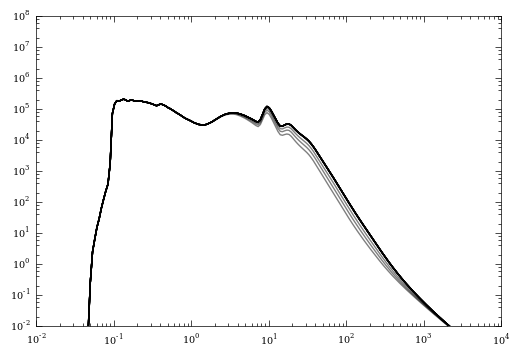

In [19]:
_ = plt.loglog(sed.wav, sed.flux.transpose(), 'k-', alpha=0.5)
_ = plt.ylim(1e-2, 1e8)

### Fitting SEDs to data

To fit SEDs to observed data,  you can also make use of the [sedfitter](http://sedfitter.readthedocs.io) package.  To demonstrate this, we will fit the above models to the data for the NGC2264 source modelled in Robitaille (2017).

What follows is a very short example - for more information on using the sedfitter package, be sure to read over the [documentation](http://sedfitter.readthedocs.io).

In [20]:
%cat data_ngc2264_20

20                             100.20250   9.59936 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 3 3   0.000e+00   0.000e+00   0.000e+00   0.000e+00   1.505e-02   1.505e-03   1.039e-01   1.039e-02   4.707e-01   4.707e-02   9.703e+00   9.703e-01   3.341e+01   3.341e+00   7.543e+01   7.543e+00   1.604e+02   1.604e+01   2.194e+02   2.194e+01   3.057e+02   3.057e+01   4.060e+02   4.060e+01   5.055e+02   5.055e+01   6.670e+02   6.670e+01   9.523e+02   9.523e+01   1.172e+03   1.172e+02   1.239e+03   1.239e+02   1.331e+03   1.331e+02   1.290e+03   1.290e+02   0.000e+00   0.000e+00   3.294e+03   1.000e+00   2.900e+02   1.000e+00 



We start off by setting up  the list of filters/wavelengths and approximate aperture radii used:

In [21]:
from astropy import units as u

In [22]:
filters = ['BU', 'BB', 'BV', 'BR', 'BI', '2J', '2H', '2K', 'I1', 'I2',
           5.580 * u.micron, 7.650 * u.micron, 9.95 * u.micron,
           12.93 * u.micron, 17.72 * u.micron, 24.28 * u.micron,
           29.95 * u.micron, 35.06 * u.micron,
           'M2', 'M3', 'W1', 'W2']

In [23]:
apertures = [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
             3., 3., 20., 30., 30., 30.] * u.arcsec

We also set up the extinction law used in Robitaille (2017):

In [24]:
from sedfitter.extinction import Extinction

In [25]:
extinction = Extinction.from_file('whitney.r550.par')

Finally, we run the fitting:

In [26]:
import sedfitter

In [27]:
sedfitter.fit('data_ngc2264_20', filters, apertures, 'sp--s-i',
              'output_ngc2264_sp--s-i.fitinfo',
              extinction_law=extinction,
              distance_range=[0.869, 0.961] * u.kpc,
              av_range=[0., 40.],
              output_format=('F', 3.),
              output_convolved=False, remove_resolved=True)

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  sp--s-i
   Log[d] stepping     :  0.02
   Number of distances :  3

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading sp--s-i/convolved/BU.fits
   Reading sp--s-i/convolved/BB.fits
   Reading sp--s-i/convolved/BV.fits
   Reading sp--s-i/convolved/BR.fits
   Reading sp--s-i/convolved/BI.fits
   Reading sp--s-i/convolved/2J.fits
   Reading sp--s-i/convolved/2H.fits
   Reading sp--s-i/convolved/2K.fits
   Reading sp--s-i/convolved/I1.fits
   Reading sp--s-i/convolved/I2.fits
   Reading fluxes at 5.58 micron
   Reading fluxes at 7.65 micron
   Reading fluxes at 9.95 micron
   Reading fluxes at 12.93 micron
   Reading fluxes at 17.72 micron
   Reading fluxes at 24.28 micron
   Reading fluxes at 29.95 mic

We now generate the SED plots with the data to examine the fit:

In [28]:
sedfitter.plot('output_ngc2264_sp--s-i.fitinfo',
               output_dir='plots_sed', format='png',
               plot_mode='A',
               select_format=('F', 3.),
               show_convolved=False, show_sed=True,
               x_mode='M', x_range=(0.1, 2000),
               y_mode='M', y_range=(1.e-14, 2e-8))

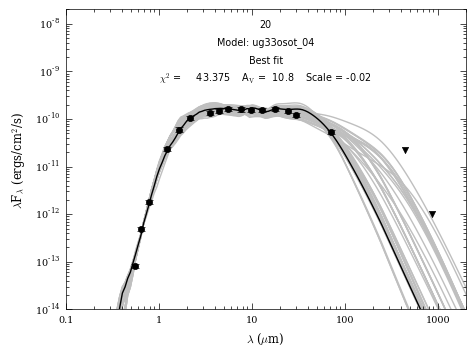

In [29]:
from IPython.display import Image
Image('plots_sed/20.png')